In [ ]:
import sqlite3
import nltk
import re
from matplotlib import pyplot as plt

conn = sqlite3.connect('DBTic.db')
c = conn.cursor()

candidatos = ["Sergio Massa", "Patricia Bullrich", "Javier Milei"]

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

def recognize_names(text):
    sentences = nltk.sent_tokenize(text)
    tokenized_sentences = [nltk.word_tokenize(sentence) for sentence in sentences]
    tagged_sentences = [nltk.pos_tag(sentence) for sentence in tokenized_sentences]
    named_entities = nltk.ne_chunk_sents(tagged_sentences, binary=True)

    names = []
    for tree in named_entities:
        for entity in tree:
            if hasattr(entity, 'label') and entity.label() == 'NE':
                name = ' '.join([child[0] for child in entity])
                if not re.search(r'\b[A-Z]+\b', name):
                    names.append(name)

    return names

# Obtener títulos de las tablas
tables = ["Ambito_Financiero", "Ole", "Perfil", "Telam"]
titles = []
for table in tables:
    c.execute(f"SELECT Titulo FROM {table}")
    result = c.fetchall()
    titles.extend([row[0] for row in result])

text = ' '.join(titles)

titles1 = text.split()
quoted_titles = ['' + title + '' for title in titles]

names = recognize_names(text)
print(names)

lista_resultante = [elemento for elemento in names if elemento in candidatos]

print(lista_resultante)

# Generar gráfico de barras con la frecuencia de los nombres
name_freq = nltk.FreqDist(names)
top_names = name_freq.most_common(10)  # Obtener los nombres más frecuentes

names, frequencies = zip(*top_names)

plt.rcParams['font.size'] = 20
plt.figure(figsize=(20, 12))
plt.bar(names, frequencies)
plt.xlabel('Nombres')
plt.ylabel('Frecuencia')
plt.title('Nombres más frecuentes')
plt.xticks(rotation=90)
plt.show()

conn.commit()
conn.close()


Sergio Massa candidato sigue al frente de Economía y acelera gestiones con el FMI y el Club de París Elecciones 2023 EN VIVO Juez comienza con ventaja en Córdoba y se aguardan resultados en Formosa José Luis Gioja respaldó la candidatura de Massa y Rossi "Es una fórmula potente" Salarios qué sectores le pudieron ganar a la inflación y qué se espera para el resto del año Plazo fijo ¿cuánto puedo ganar si deposito todo el aguinaldo? Juez aventaja a Llaryora en primeros datos oficiales de elección en Córdoba Cerraron los comicios en Formosa Insfrán confía en lograr su octavo mandato PASO quiénes serán los candidatos al Parlasur tras el cierre de listas Estas son las fórmulas presidenciales confirmadas Paso Cristo Redentor estiman que seguirá cerrado una semana más tras el temporal Desde mañana el tren Mitre vuelve a funcionar hasta Retiro De grietas cambios cábalas y el Modelo Córdoba  la apretada agenda de votación de los protagonistas Elecciones en Córdoba llegó Patricia Bullrich y agua

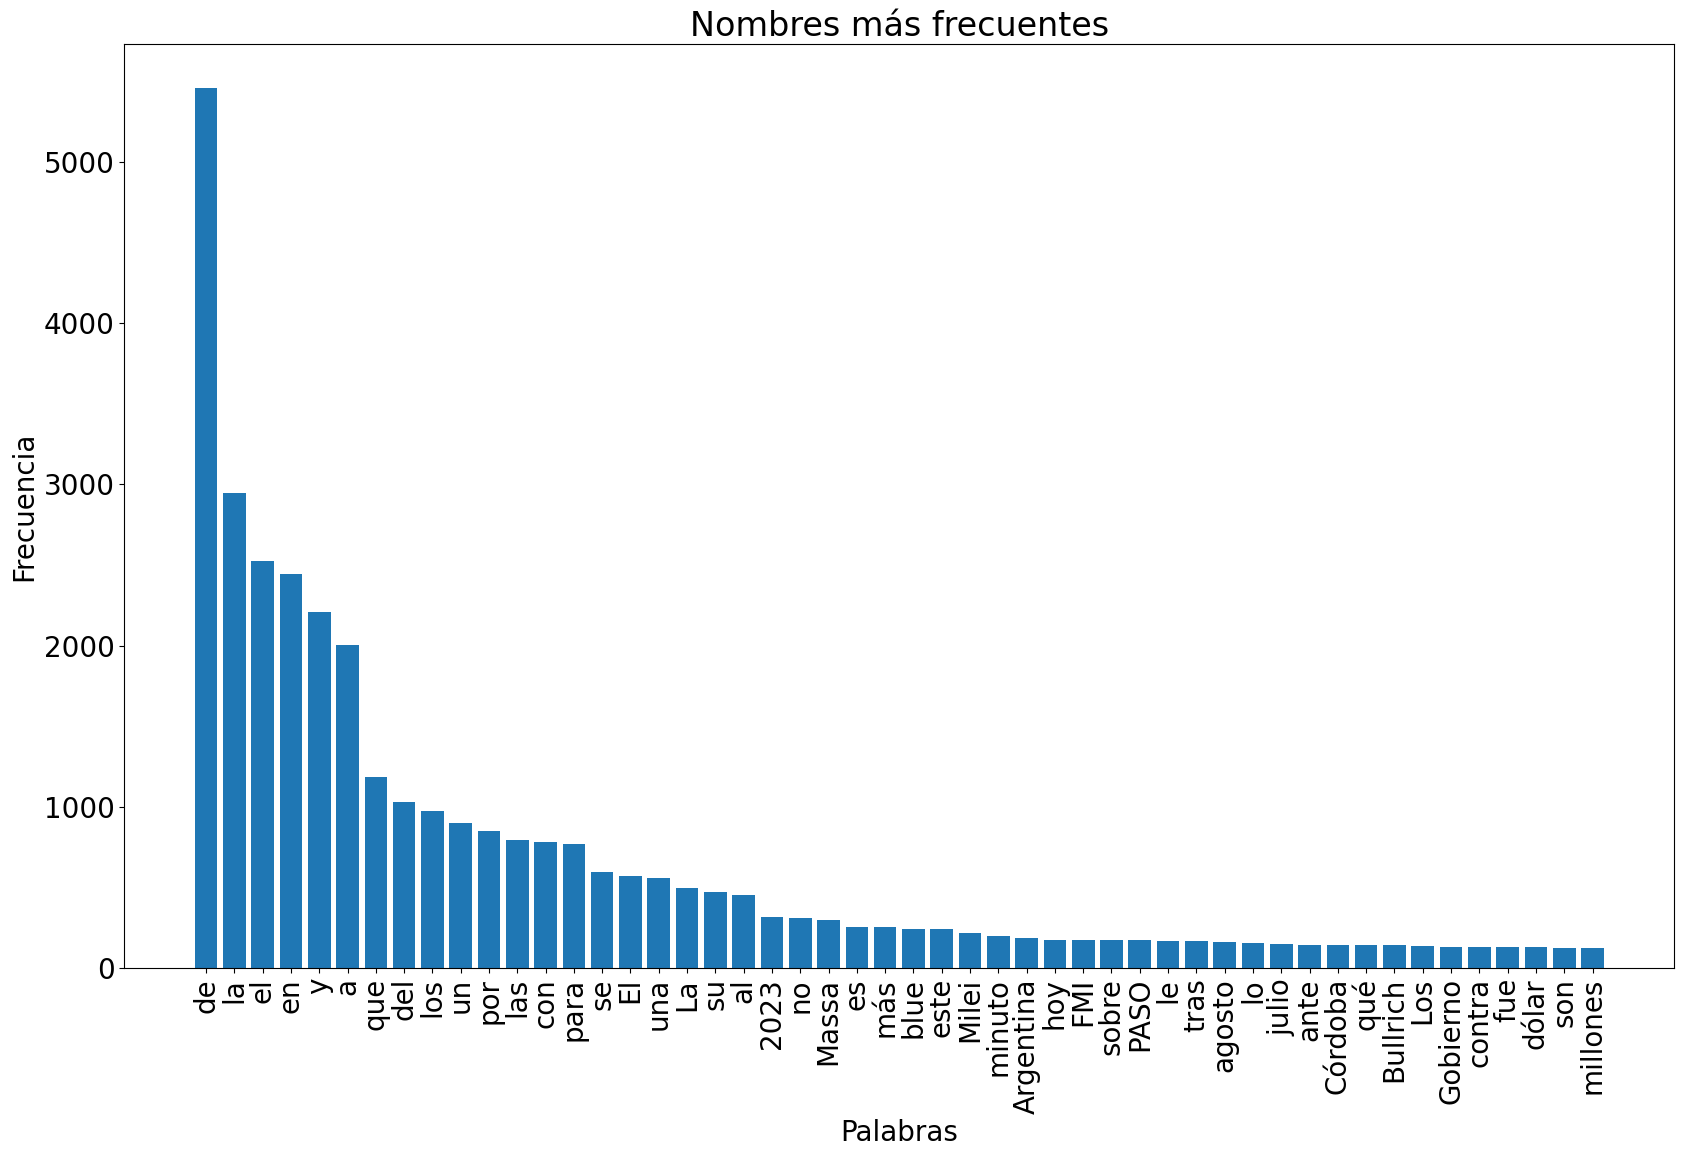

In [79]:

import sqlite3
import nltk
from matplotlib import pyplot as plt

conn = sqlite3.connect('DBTic.db')
c = conn.cursor()

tables = ["Ambito_Financiero", "Ole", "Perfil", "Telam"]
titles = []
for table in tables:
    c.execute(f"SELECT Titulo FROM {table}")
    result = c.fetchall()
    titles.extend([row[0] for row in result])

list = " ".join(titles)

exclude = [":", ".", ",", ")", "("]

res = list.translate(str.maketrans({ord(x): '' for x in exclude}))
print(res)
print(type(res))

res2 = res.split()
print(res2)
print(type(res2))

name_freq = nltk.FreqDist(res2)
top_names = name_freq.most_common(50)  

names, frequencies = zip(*top_names)

plt.rcParams['font.size'] = 20
plt.figure(figsize=(20, 12))
plt.bar(names, frequencies)
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('Nombres más frecuentes')
plt.xticks(rotation=90)
plt.show()

conn.commit()
conn.close()

